# Salary Predictions Based on Job Descriptions

    
### Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
import sys
import os
helper_dir = os.path.join('..','HelperFunction')
sys.path.append(helper_dir)
import HelperFunction as helpers
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [46]:
data_features = pd.read_csv("./data/train_features.csv")
data_salary = pd.read_csv("./data/train_salaries.csv")

In [47]:
data = pd.merge(data_features, data_salary)

In [48]:
data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


### Check NANs

In [49]:
list(data.isna().sum())

[0, 0, 0, 0, 0, 0, 0, 0, 0]

### Explore numerical and categorical data

In [50]:
numerical_col = ['yearsExperience', 'milesFromMetropolis', 'salary']

In [51]:
data.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [52]:
categorical_col = ['companyId', 'jobType', 'degree', 'major', 'industry']

In [53]:
data.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684407687,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [54]:
del data["jobId"]

## Data Examination

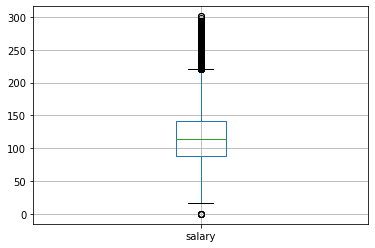

In [55]:
data[['salary']].boxplot()
plt.show()

C:\Users\SR133EX\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


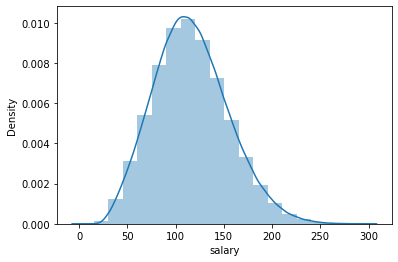

In [56]:
sns.distplot(data['salary'], bins=20)
plt.show()

### Examine outliers

In [57]:
helpers.statistical_reports(data['salary'])

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [58]:
#check potential outliers below lower bound
data[data.salary < 8.5]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Those are missing data because for example a CTO, manager or Vice_president with several years of experience won't work for free

In [59]:
#remove those where salary = 0
data = data[data.salary != 0]

In [60]:
#check potential outliers below upper bound
data.loc[data.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

I agree that the salary starting from senior roles and above pay high salaries. So I will only examine junior outliers

In [61]:
#check potential junior outliers above upper bound
data[(data.salary > 220.5) & (data.jobType =='JUNIOR')]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Those will also be removed because I don't think it is reasonable to be a junior after having more than 10 years of experience

In [62]:
#remove those outliers
data_to_drop = data[(data.salary > 220.5) & (data.jobType =='JUNIOR')].index

In [63]:
data.drop(data_to_drop, inplace=True)

C:\Users\SR133EX\AppData\Local\Temp\ipykernel_11096\2614865517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data_to_drop, inplace=True)


## Data visualization

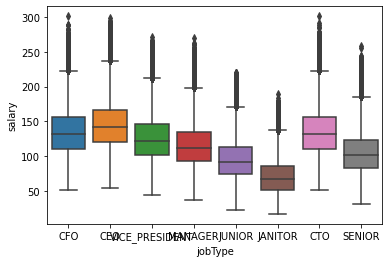

In [64]:
sns.boxplot(x = 'jobType',y='salary', data=data)
plt.show()

C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:154: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


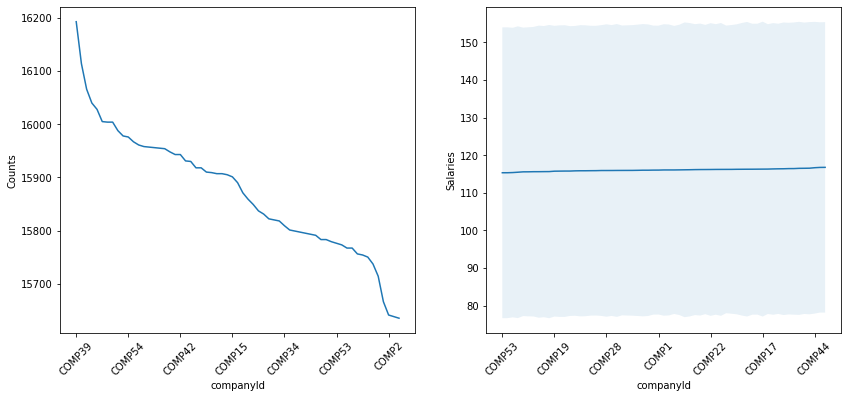

In [65]:
helpers.plot_feature(data, 'companyId')

C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:154: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


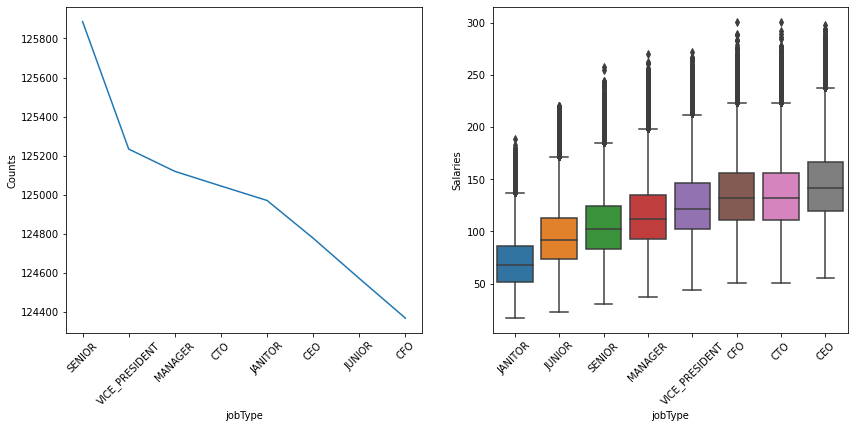

In [66]:
helpers.plot_feature(data, 'jobType')

C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:154: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


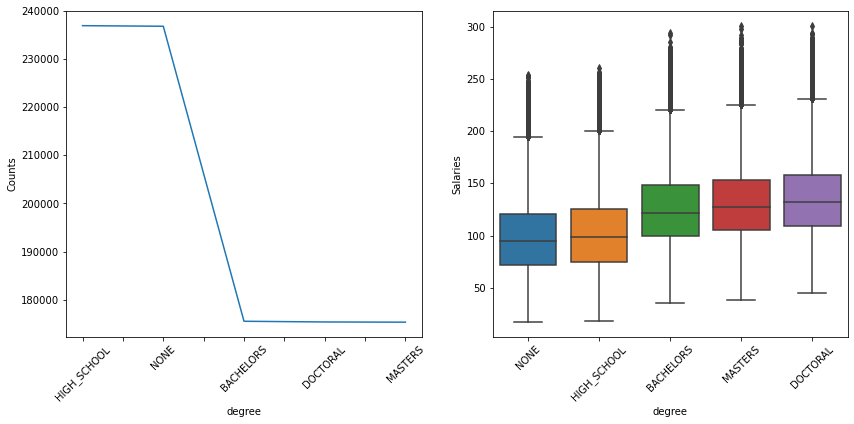

In [67]:
helpers.plot_feature(data, "degree")

C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:154: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


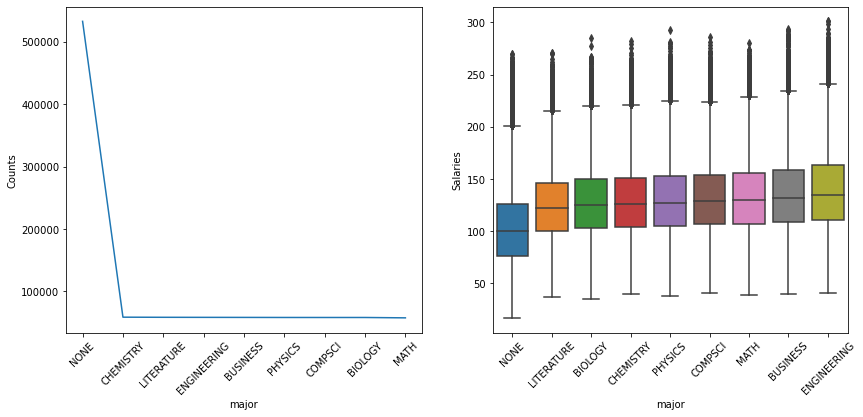

In [68]:
helpers.plot_feature(data, "major")

C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\SR133EX\Ironhack\unidad_1\lessons\Final_project\Salary-Prediction-For-Future-Employee\Notebook\..\HelperFunction\HelperFunction.py:154: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


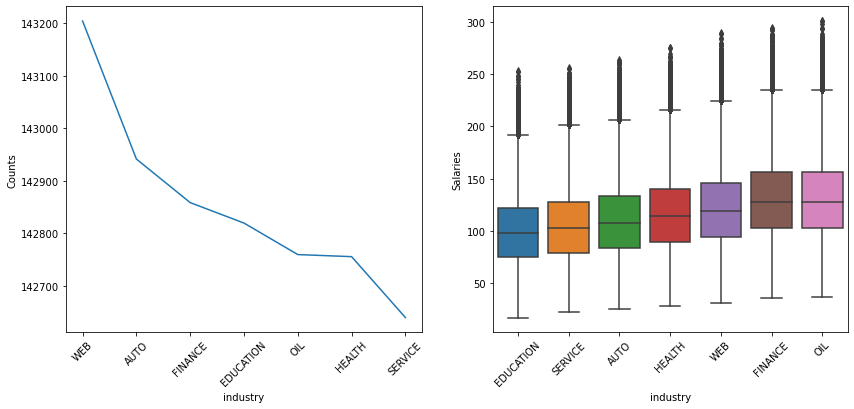

In [69]:
helpers.plot_feature(data, 'industry')

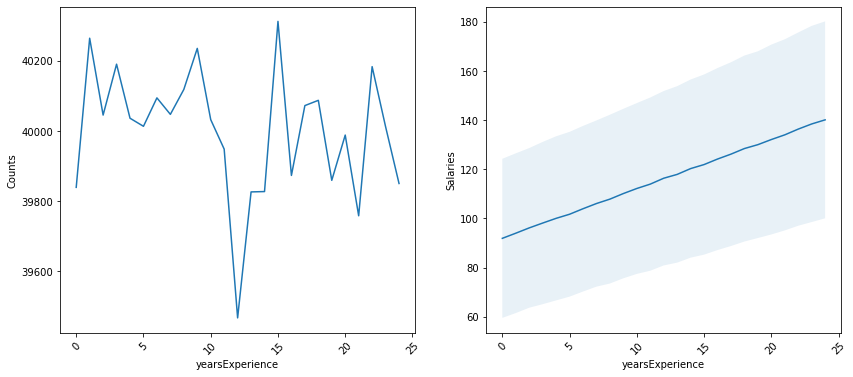

In [70]:
helpers.plot_feature(data, 'yearsExperience')

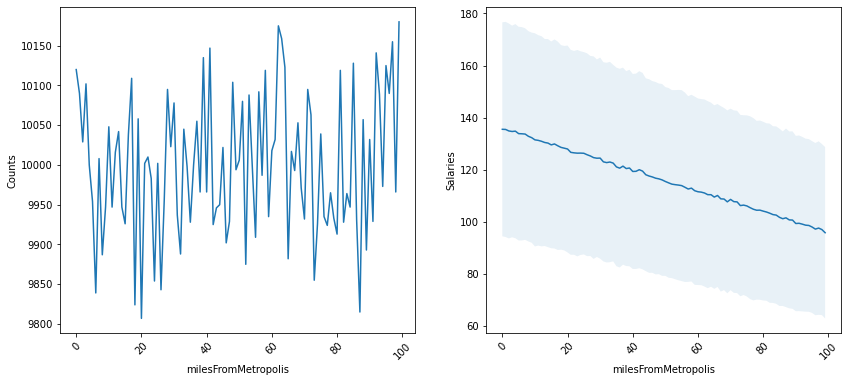

In [71]:
helpers.plot_feature(data, 'milesFromMetropolis')

## Standarize

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
for c in numerical_col[:-1]:   # we'll normalize all column except the last one (the target column)
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

C:\Users\SR133EX\AppData\Local\Temp\ipykernel_11096\3820214346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))
C:\Users\SR133EX\AppData\Local\Temp\ipykernel_11096\3820214346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))


## Encoding Categorical Data

In [74]:
one_hot_data=pd.get_dummies(data[categorical_col], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,companyId_COMP37,companyId_COMP57,companyId_COMP42,companyId_COMP54,companyId_COMP18,companyId_COMP31,companyId_COMP55,companyId_COMP45,companyId_COMP30,companyId_COMP19,...,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Concat numerical and categorical Dataframes

In [75]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=categorical_col, inplace=True)
data.head()

,yearsExperience,milesFromMetropolis,salary,companyId_COMP37,companyId_COMP57,companyId_COMP42,companyId_COMP54,companyId_COMP18,companyId_COMP31,companyId_COMP55,...,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,-0.276222,1.159032,130,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,-1.246787,0.812740,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.276222,-0.399281,137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.553526,-1.126493,142,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.553526,-1.161123,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Splitting into train set and test set

In [76]:
# first, split X-y (learning-target data)
X=data.drop(columns=['salary'])
y=data['salary']

# checking shape
print(X.shape)
print(y.shape)

(999975, 89)
(999975,)


In [77]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

In [78]:
# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

## Modeling

### Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

### Regulation

In [80]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2

In [81]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [82]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [83]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

### Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

### XGBoost

In [88]:
# conda install -c conda-forge xgboost

from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

### LightGBM

In [89]:
# conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

## Model Validation

In [90]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

### R2

In [91]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7433291204279943 -- test R2: 0.7446711474805765
Model: lasso, train R2: 0.5953794363932017 -- test R2: 0.5962734142141308
Model: ridge, train R2: 0.7433291194594739 -- test R2: 0.744671010835412
Model: elastic, train R2: 0.32389954644138896 -- test R2: 0.3240576345771704
Model: rfr, train R2: 0.9607829052059875 -- test R2: 0.724620618193763
Model: xgbr, train R2: 0.7642538220900519 -- test R2: 0.7603542788142035
Model: lgbmr, train R2: 0.7621006055665354 -- test R2: 0.7623525057013357


### MSE

In [92]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 384.25890051002074 -- test MSE: 384.42924038089785
Model: lasso, train MSE: 605.752600975038 -- test MSE: 607.8604245614129
Model: ridge, train MSE: 384.258901959981 -- test MSE: 384.429446117133
Model: elastic, train MSE: 1012.1818936061866 -- test MSE: 1017.715027176563
Model: rfr, train MSE: 58.71144304282838 -- test MSE: 414.6177978702177
Model: xgbr, train MSE: 352.9327801976197 -- test MSE: 360.81634193291916
Model: lgbmr, train MSE: 356.15633487303165 -- test MSE: 357.8077636357583


### RMSE

In [93]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 19.60252280983294 -- test RMSE: 19.60686717405149
Model: lasso, train RMSE: 24.61204178801584 -- test RMSE: 24.654825583674544
Model: ridge, train RMSE: 19.602522846816964 -- test RMSE: 19.606872420585926
Model: elastic, train RMSE: 31.81480620098426 -- test RMSE: 31.90164615151643
Model: rfr, train RMSE: 7.662339267014244 -- test RMSE: 20.362165844286253
Model: xgbr, train RMSE: 18.786505268346737 -- test RMSE: 18.995166278106627
Model: lgbmr, train RMSE: 18.87210467523513 -- test RMSE: 18.91580724250906


### MAE

In [94]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 15.842658799145491 -- test MAE: 15.838646022642138
Model: lasso, train MAE: 19.95298025776525 -- test MAE: 19.97732358962249
Model: ridge, train MAE: 15.842651473838147 -- test MAE: 15.838643923703996
Model: elastic, train MAE: 25.545010385763252 -- test MAE: 25.610202705149643
Model: rfr, train MAE: 6.054138009745786 -- test MAE: 16.261813563652584
Model: xgbr, train MAE: 15.260613942380553 -- test MAE: 15.40624243259585
Model: lgbmr, train MAE: 15.335907351254853 -- test MAE: 15.362218163152432
